# **Designing a Marketing Campaign for Zomato Using Exploratory Data Analysis**
## **Indian Restaurants Market Analysis**

##### Saba Gul

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

## **Data Cleaning and Preparation:**

In [155]:
df = pd.read_csv("zomato_restaurants_in_India.csv", encoding='latin1')


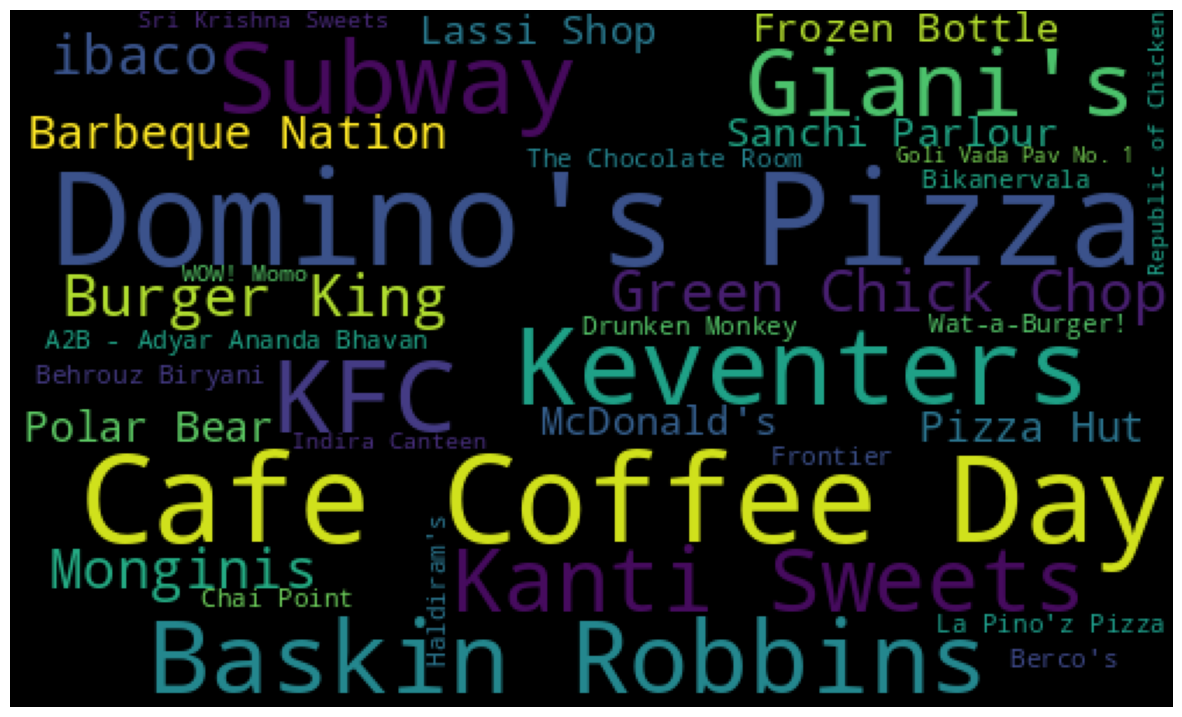

In [150]:
stopwords = set(STOPWORDS)

wordcloud = (WordCloud(width=500, height=300, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(df['name'].value_counts().head(35)))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [74]:
df.shape

(75106, 26)

In [75]:

df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34.0,Khandari,27.211450,78.002381,...,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34.0,Agra Cantt,27.160569,78.011583,...,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34.0,Shahganj,27.182938,77.979684,...,1.0,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34.0,Civil Lines,27.205668,78.004799,...,1.0,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34.0,Tajganj,27.157709,78.052421,...,3.0,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0


In [76]:

df.tail(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
75101,18739658,Param Food Complex,['Casual Dining'],https://www.zomato.com/gwalior/param-food-comp...,Moti Mahal Road Padav Gwalior,Gwalior,11337.0,Lashkar,26.210254,78.175223,...,3.0,Rs.,"['Cash', 'Dinner', 'Takeaway Available', 'Lunc...",4.0,Very Good,240.0,10.0,0.0,-1.0,-1.0
75102,18739193,Ice Kraft,['Dessert Parlour'],https://www.zomato.com/gwalior/ice-kraft-city-...,Green Garden Road City Center,Gwalior,11337.0,City Center,26.208826,78.189585,...,1.0,Rs.,"['Cash', 'Credit Card', 'Takeaway Available', ...",4.1,Very Good,128.0,87.0,0.0,1.0,-1.0
75103,19015642,Twisted Toppings Pizza And Food,['Quick Bites'],https://www.zomato.com/gwalior/twisted-topping...,"GH 163, Deen Dayal Nagar, Gwalior",Gwalior,11337.0,Deen Dayal Nagar,26.266111,78.208337,...,1.0,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",4.1,Very Good,110.0,2.0,0.0,-1.0,-1.0
75104,18788845,SB Street Foods,['Quick Bites'],https://www.zomato.com/gwalior/sb-street-foods...,"Opposite Ashiyana Complex, Near High Court, La...",Gwalior,11337.0,Lashkar,26.207360,78.166048,...,1.0,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",4.8,Excellent,274.0,4.0,0.0,-1.0,-1.0
75105,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [156]:

print(df.dtypes)

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object


In [157]:
# Correct data types
df['city_id'] = df['city_id'].astype('Int64')
df['country_id'] = df['country_id'].astype('Int64')
df['zipcode'] = df['zipcode'].astype(str)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  Int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               211944 non-null  object 
 11  country_id            211944 non-null  Int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

### Removing duplicates


In [159]:
df.duplicated().sum()

151527

Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [160]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
df.shape

(55568, 26)

In [161]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

### **Check for missing values:**

In [162]:
df.isnull().sum()

res_id                     0
name                       0
establishment              0
url                        0
address                   18
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
zipcode                    0
country_id                 0
locality_verbose           0
cuisines                 470
timings                 1003
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         12
delivery                   0
takeaway                   0
dtype: int64

We have 5 variables with some kind of missing values. Since zipcode has more than 80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

In [163]:

df['cuisines'].fillna('Unknown', inplace=True)



In [164]:

df['timings'].fillna('Not available', inplace=True)

### **Omitting Irrelevant features**
Here we will look at each feature and decide to consider them for our analysis or not:

- *res_id* - Unique ID for each restaurant
- *name* - Name is useful since we will use it to find top restaurants
- *establishment* - Let's see what type of values we have in establishment

Next, we'll look for mislabeled categories or inconsistent values in data columns:

In [165]:

print(df['establishment'].unique())

["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['CafÃ©']"
 "['Dhaba']" "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]


In [166]:
print(df["establishment"].unique()[0])
print(type(df["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


The 'Establishment' feature exhibits noise with extraneous square brackets and quotes. Utilizing the apply() function, we can efficiently cleanse these artifacts. Additionally, we'll address the presence of an empty string value by renaming it to "NA" to mitigate potential confusion. This data refinement process ensures a streamlined and accurate foundation for subsequent analysis, enhancing the efficacy of our exploratory endeavors.

In [167]:
df["establishment"] = df["establishment"].astype(str)
# Removing [' '] from each value
print(df["establishment"].unique()[0])
df["establishment"] = df["establishment"].apply(lambda x:x[2:-2])
print(df["establishment"].unique()[0])

# Changing ''  to 'NA'
print(df["establishment"].unique())
df["establishment"] = df["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(df["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'CafÃ©' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'CafÃ©' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [168]:

df['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [169]:
print(df["timings"].nunique())
print(df["timings"].unique())

7741
['8:30am â\x80\x93 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ...
 '8am â\x80\x93 2:30pm, 5pm â\x80\x93 10pm (Mon-Sun)'
 '8am â\x80\x93 3pm, 6:30pm â\x80\x93 11pm (Mon-Sun)'
 '4pm â\x80\x93 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm â\x80\x93 11:30pm (Thu)']


This column has missing data, however it has 7741 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [180]:
df["average_cost_for_two"].nunique()
df["average_cost_for_two"].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

This is an interesting feature for our analysis, although the value "0" of average cost for 2 is strange and should be treated as an outlier

In [181]:
df["price_range"].unique()

array([2, 1, 3, 4])

Average prices automatically characterized into bins ranging from 1-4 with 4 being the most expensive restaurant

In [182]:
df["currency"].unique()

array(['Rs.'], dtype=object)

 Only one category of currency is in our data therefore, it is not useful and can be omitted from our analysis

In [184]:
df["highlights"].nunique()
df["highlights"].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [185]:
hl = []
df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


"highlights" column represents the different features that the restaurant offers and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [190]:
print(df["opentable_support"].unique())
df["opentable_support"].nunique()

[ 0. nan]


1

"opentable_support" is ot a useful feature since it has a single category

In [189]:
print(df["delivery"].unique())
df["delivery"].nunique()

[-1  1  0]


3

"delivery" has 3 classes but there is no explanation for those labels. We can consider -1 and 0 to be one class or ignore this feature for now

In [193]:
print(df["locality"].nunique())
df["locality"].unique()

3731


array(['Khandari', 'Agra Cantt', 'Shahganj', ..., 'Navapura',
       'L&T Knowledge City', 'Danteshwar'], dtype=object)

Although "locality" can be an interesting feature, but since the feature has so many unique classes, we will avoid it for initial analysis

In [195]:
print(df["country_id"].nunique())
df["country_id"].unique()

1


<IntegerArray>
[1]
Length: 1, dtype: Int64

 Since this dataset is for Indian restaurants, there should be just one unique id here as seen in the output above.

In [196]:
df["locality_verbose"].nunique()
df["locality_verbose"].unique()

array(['Khandari, Agra', 'Agra Cantt, Agra', 'Shahganj, Agra', ...,
       'Navapura, Vadodara', 'L&T Knowledge City, Vadodara',
       'Danteshwar, Vadodara'], dtype=object)

Although "locality_verbose" can be an interesting feature, but since the feature has so many unique categories, we will avoid it for initial analysis

In [205]:
print(df["rating_text"].nunique())
df["rating_text"].unique()

33


array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'Ä°yi', 'Ã\x87ok iyi', 'Baik',
       'Sangat Baik', 'SkvÄ\x9blÃ©', 'Muy Bueno', 'PrÅ¯mÄ\x9br',
       'Ortalama', 'SkvÄ\x9blÃ¡ volba', 'Muito bom', 'Velmi dobrÃ©',
       'Excelente', 'Bom', 'Scarso', 'Promedio', 'VynikajÃºce', 'Bueno',
       'DobrÃ©', 'Terbaik', 'Harika', 'VeÄ¾mi dobrÃ©', 'Eccellente',
       'Buono', 'MÃ©dia', 'Dobrze'], dtype=object)

In [201]:
print(df["aggregate_rating"].nunique())
df["aggregate_rating"].unique()

33


array([4.4, 4.2, 4.3, 4.9, 4. , 3.8, 3.4, 4.1, 3.5, 4.6, 3.9, 3.6, 4.5,
       4.7, 3.7, 4.8, 3.2, 0. , 3.3, 2.8, 3.1, 2.6, 3. , 2.7, 2.9, 2.2,
       2.3, 2.4, 2.5, 2.1, 1.8, 2. , 1.9])

In [202]:
print(df["votes"].nunique())
df["votes"].unique()

2644


array([ 814, 1203,  801, ..., 2001, 1191, 1583])

In [203]:
print(df["photo_count"].nunique())
df["photo_count"].unique()

2457


array([154, 161, 107, ..., 987, 678, 828])

- aggregate_rating - Rating given to the restaurant
- rating_text - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this. Moreover, rating text is in different languages which would obfuscate our analysis.
- votes - Number of votes contributing to the rating
- photo_count - Photo uploads in reviews

In [198]:
df[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [170]:
# Check unique values in 'cuisines' column
print(df['cuisines'].unique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [171]:
df["cuisines"] = df["cuisines"].fillna("No cuisine")

In [175]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


For feature engineering, we can extract useful information from existing data. For example, we can extract the number of cuisines offered by each restaurant:

In [173]:
# Create a new column to represent the total number of cuisines offered
df['total_cuisines'] = df['cuisines'].str.split(',').apply(len)


In [174]:
# Display 'name of restaurant' and 'total_cuisines' columns
df_subset = df[['name', 'total_cuisines']]
print(df_subset.head())

                             name  total_cuisines
0                     Bikanervala               5
1  Mama Chicken Mama Franky House               6
2                   Bhagat Halwai               2
3                   Bhagat Halwai               4
4     The Salt Cafe Kitchen & Bar               3


In [176]:
# Extract useful information from 'timings' column
# df['opening_time'] = df['timings'].str.extract(r'^(\d{1,2}:\d{2}[ap]m)').fillna('')
# df['closing_time'] = df['timings'].str.extract(r'(\d{1,2}:\d{2}[ap]m)$').fillna('')

In [177]:
print(df.head())

    res_id                            name  establishment  \
0  3400299                     Bikanervala    Quick Bites   
1  3400005  Mama Chicken Mama Franky House    Quick Bites   
2  3401013                   Bhagat Halwai    Quick Bites   
3  3400290                   Bhagat Halwai    Quick Bites   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anja

## **Exploratory Data Analysis:**

### **Descriptive Statistics:**

In [98]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe()


Descriptive Statistics:


,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,total_cuisines
count,2.057400e+04,20573.0,20573.000000,20573.000000,20573.0,20573.000000,20573.000000,20573.000000,20573.000000,20573.000000,20571.0,20573.000000,20573.0,20574.000000
mean,1.148475e+07,1662.46459,21.731415,77.273745,1.0,588.749186,1.811938,3.076654,268.835270,200.759150,0.0,-0.309581,-1.0,2.326966
std,8.587143e+06,3988.5918,7.330629,9.662204,0.0,633.043342,0.933096,1.423814,682.547724,650.721432,0.0,0.948183,0.0,1.348905
min,1.000000e+00,1.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0,1.000000
25%,2.200676e+06,7.0,13.069390,76.734414,1.0,200.000000,1.000000,2.900000,8.000000,3.000000,0.0,-1.000000,-1.0,1.000000
50%,1.843550e+07,13.0,23.179671,77.430127,1.0,400.000000,2.000000,3.600000,51.000000,18.000000,0.0,-1.000000,-1.0,2.000000
75%,1.878581e+07,30.0,28.479964,78.200819,1.0,700.000000,2.000000,4.000000,235.000000,114.000000,0.0,1.000000,-1.0,3.000000
max,1.915935e+07,11339.0,32.248043,91.832769,1.0,14000.000000,4.000000,4.900000,18967.000000,17702.000000,0.0,1.000000,-1.0,8.000000


In [99]:
df.describe(include=['bool','object'])

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text,opening_time,closing_time
count,20573,20574,20573,20572,20573,20573,20574,20573,20574,20574,20573,20573,20573,20574,20574
unique,15550,25,20573,18746,35,1618,510,1704,4462,3766,1,13640,23,45,1
top,Domino's Pizza,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"SBR Social, Beside Sattva Vikas School, Sindhu...",Bangalore,Civil Lines,nan,"Lashkar, Gwalior",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good,,
freq,131,4689,1,21,2247,308,15988,224,1552,2423,20573,275,6050,20011,20574


In [100]:
# Dispersion
dispersion = df.describe(include='all')
dispersion

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,total_cuisines,opening_time,closing_time
count,2.057400e+04,20573,20574,20573,20572,20573,20573.0,20573,20573.000000,20573.000000,...,20573.000000,20573,20573.000000,20573.000000,20571.0,20573.000000,20573.0,20574.000000,20574,20574
unique,NaN,15550,25,20573,18746,35,<NA>,1618,NaN,NaN,...,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,45,1
top,NaN,Domino's Pizza,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"SBR Social, Beside Sattva Vikas School, Sindhu...",Bangalore,<NA>,Civil Lines,NaN,NaN,...,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,,
freq,NaN,131,4689,1,21,2247,<NA>,308,NaN,NaN,...,NaN,6050,NaN,NaN,NaN,NaN,NaN,NaN,20011,20574
mean,1.148475e+07,NaN,NaN,NaN,NaN,NaN,1662.46459,NaN,21.731415,77.273745,...,3.076654,NaN,268.835270,200.759150,0.0,-0.309581,-1.0,2.326966,NaN,NaN
std,8.587143e+06,NaN,NaN,NaN,NaN,NaN,3988.5918,NaN,7.330629,9.662204,...,1.423814,NaN,682.547724,650.721432,0.0,0.948183,0.0,1.348905,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,0.000000,...,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0,1.000000,NaN,NaN
25%,2.200676e+06,NaN,NaN,NaN,NaN,NaN,7.0,NaN,13.069390,76.734414,...,2.900000,NaN,8.000000,3.000000,0.0,-1.000000,-1.0,1.000000,NaN,NaN
50%,1.843550e+07,NaN,NaN,NaN,NaN,NaN,13.0,NaN,23.179671,77.430127,...,3.600000,NaN,51.000000,18.000000,0.0,-1.000000,-1.0,2.000000,NaN,NaN
75%,1.878581e+07,NaN,NaN,NaN,NaN,NaN,30.0,NaN,28.479964,78.200819,...,4.000000,NaN,235.000000,114.000000,0.0,1.000000,-1.0,3.000000,NaN,NaN


### **Distribution Analysis for key variables:**

In [101]:
# Distribution Analysis
# Ratings distribution
ratings_distribution = df['aggregate_rating'].value_counts()
ratings_distribution

aggregate_rating
0.0    3289
4.0    1427
3.9    1409
3.8    1305
3.7    1243
4.1    1235
3.6    1112
4.2     999
3.5     989
3.4     946
3.3     905
3.2     864
4.3     733
3.1     573
2.9     528
4.4     485
3.0     454
2.8     374
4.5     315
2.7     315
2.6     217
4.6     190
2.5     173
2.4     133
4.7     113
2.3      77
4.8      61
4.9      54
2.2      29
2.1      17
2.0       5
1.9       3
1.8       1
Name: count, dtype: int64

In [102]:

# Price range distribution
price_range_distribution = df['price_range'].value_counts()

# Total cuisines distribution
total_cuisines_distribution = df['total_cuisines'].value_counts()



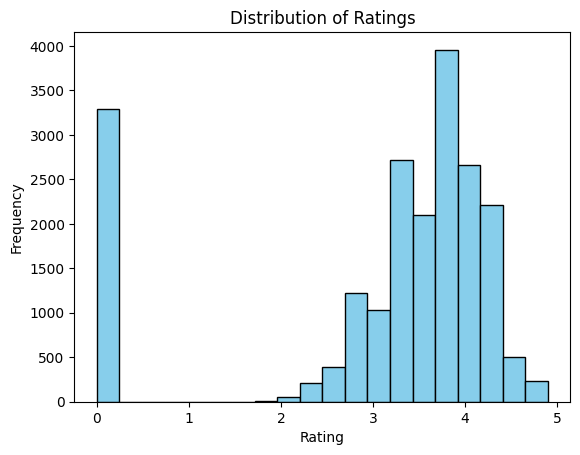

In [103]:

import matplotlib.pyplot as plt

# Distribution of ratings
plt.hist(df['aggregate_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



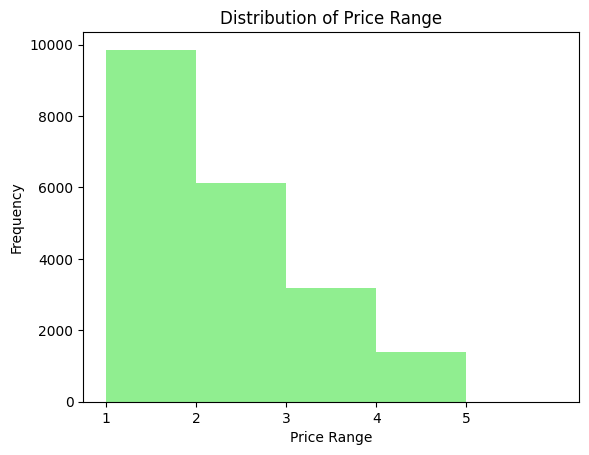

In [104]:

# Distribution of price range
plt.hist(df['price_range'], bins=range(1, 7), color='lightgreen')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()



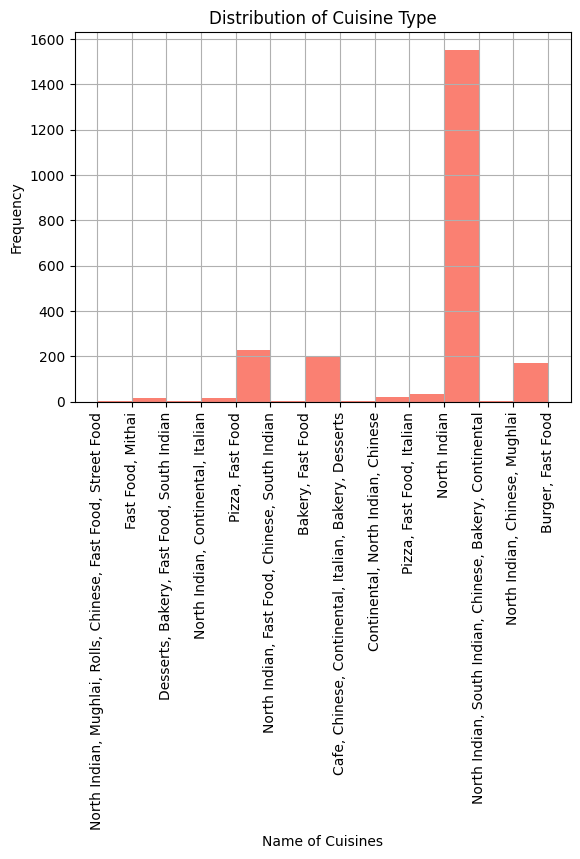

In [105]:
# Distribution of cuisine type offered by each returant
df['cuisines'].hist(color='salmon', bins=range(1, 15))
plt.title('Distribution of Cuisine Type')
plt.xlabel('Name of Cuisines')
plt.ylabel('Frequency')
plt.xticks(range(1, 15))
# Rotate x-axis labels at 90 degrees
plt.xticks(rotation=90)
plt.show()

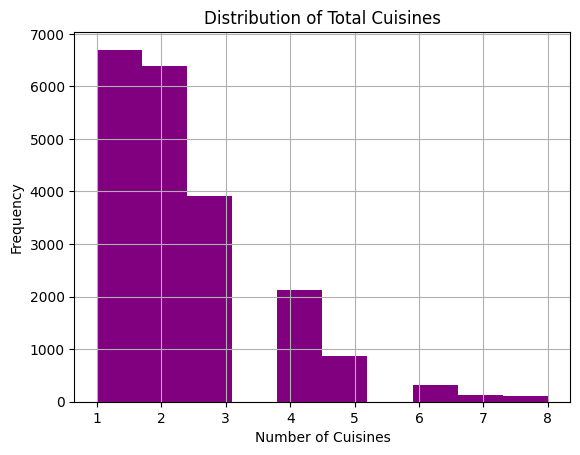

In [106]:
# Distribution of total cuisines offered by each resturant
df['total_cuisines'].hist(color='purple')
plt.title('Distribution of Total Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Frequency')
plt.show()

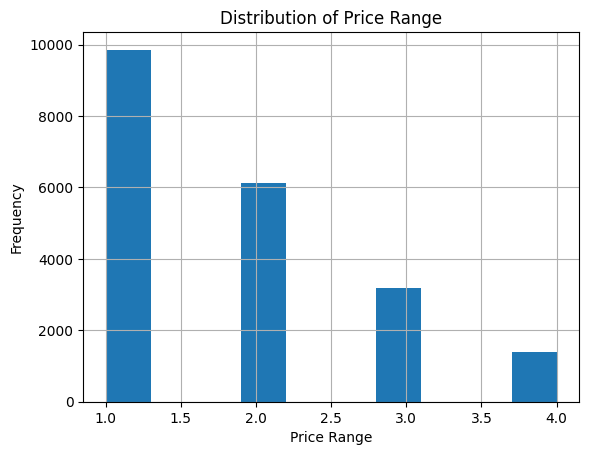

In [107]:
# Distribution of price range
df['price_range'].hist()
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

### **Restaurant chains**
#### Chains vs Outlets

In [109]:
outlets = df["name"].value_counts()
outlets

name
Domino's Pizza             131
Cafe Coffee Day            112
Keventers                   86
KFC                         79
Baskin Robbins              77
                          ... 
Murli                        1
Malabar Bay                  1
BYLI - Bet You Love It!      1
Silbatti                     1
Hotel Mascot                 1
Name: count, Length: 15550, dtype: int64

In [110]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [111]:
chains


name
Domino's Pizza               131
Cafe Coffee Day              112
Keventers                     86
KFC                           79
Baskin Robbins                77
                            ... 
Delhi Soya Chaap Wala          2
Karnavati Snacks               2
Pawan's Bikaner Bhujiwala      2
Black Deer                     2
Alaturka                       2
Name: count, Length: 1626, dtype: int64

In [112]:
single

name
Sangam Food Point               1
Bowwow                          1
Eltham Bakery & Coffee House    1
Empire The Meat Shop            1
Madison & Pike                  1
                               ..
Murli                           1
Malabar Bay                     1
BYLI - Bet You Love It!         1
Silbatti                        1
Hotel Mascot                    1
Name: count, Length: 13924, dtype: int64

In [113]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are part of some chain = ", df.shape[0] - chains.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - chains.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  20574
Total Restaurants that are part of some chain =  18948
Percentage of Restaurants that are part of a chain =  92.0 %


In [114]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that have a Single Outlet = ", df.shape[0] - single.shape[0])
print("Percentage of Restaurants that have a Single Outlet = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  20574
Total Restaurants that have a Single Outlet =  6650
Percentage of Restaurants that have a Single Outlet =  32.0 %


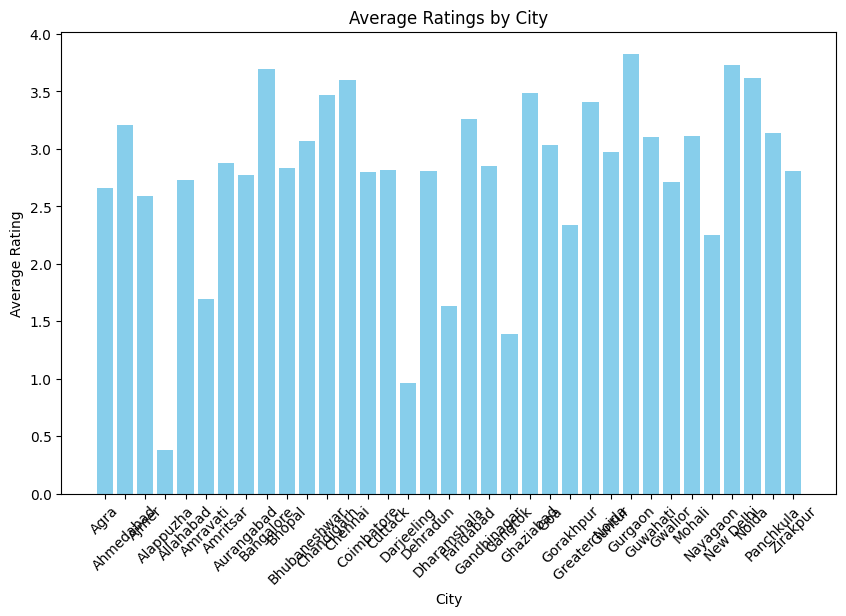

In [117]:
# Visualization
# Plotting the average ratings
plt.figure(figsize=(10, 6))
plt.bar(city_stats.index, city_stats['aggregate_rating'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


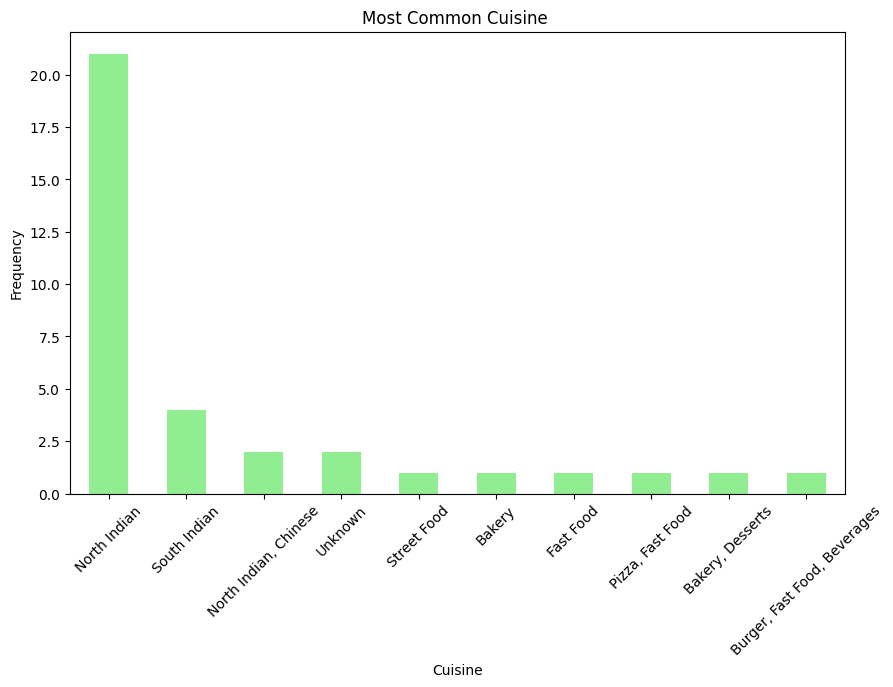

In [118]:

# Plotting the most common cuisine
plt.figure(figsize=(10, 6))
city_stats['cuisines'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.title('Most Common Cuisine ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Customer Preference Analysis:
- Analyze the types of cuisines that are popular in different regions.
- Examine the relationship between restaurant ratings, price range, and
popularity.

In [119]:
# Analyze the types of cuisines that are popular in different regions
popular_cuisines = df['cuisines'].value_counts().head(10)
print("Top 10 Popular Cuisines:")
print(popular_cuisines)



Top 10 Popular Cuisines:
cuisines
North Indian             1552
Fast Food                 669
North Indian, Chinese     616
Bakery                    540
South Indian              458
Street Food               378
Cafe                      354
Mithai                    320
Desserts                  304
Beverages                 291
Name: count, dtype: int64


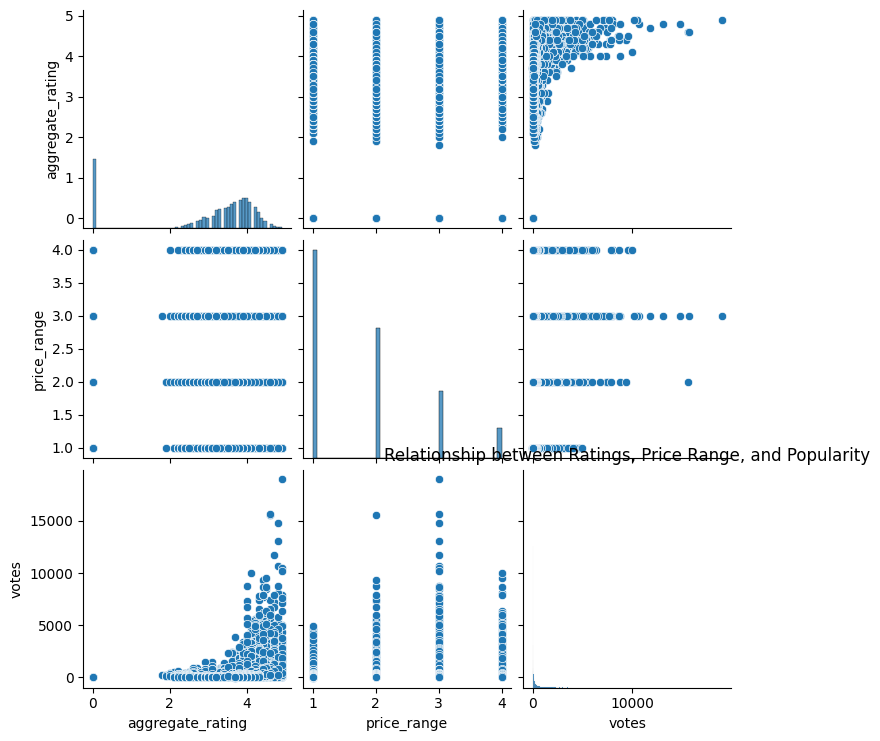

In [120]:
# Examine the relationship between restaurant ratings, price range, and popularity

sns.pairplot(df[['aggregate_rating', 'price_range', 'votes']])
plt.title('Relationship between Ratings, Price Range, and Popularity')
plt.show()


In [121]:
# Analyze popular cuisines in different regions
popular_cuisines_by_region = df.groupby('city')['cuisines'].apply(lambda x: pd.Series(x.str.split(',').sum()).value_counts().head(5))



In [122]:
# Display the top 5 popular cuisines in each region
print("Top 5 Popular Cuisines in Different Regions:")
print(popular_cuisines_by_region)


Top 5 Popular Cuisines in Different Regions:
city                   
Agra      North Indian     277
           Chinese         142
           Fast Food       118
          Mithai            99
           Continental      83
                          ... 
Zirakpur  North Indian      54
           Fast Food        36
           Chinese          34
           Desserts         17
           North Indian     16
Name: cuisines, Length: 175, dtype: int64


In [123]:

# Examine the relationship between restaurant ratings, price range, and popularity
ratings_price_range_popularity = df[['aggregate_rating', 'price_range', 'votes']]
correlation_matrix = ratings_price_range_popularity.corr()


In [124]:

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                  aggregate_rating  price_range     votes
aggregate_rating          1.000000     0.269725  0.297260
price_range               0.269725     1.000000  0.246619
votes                     0.297260     0.246619  1.000000


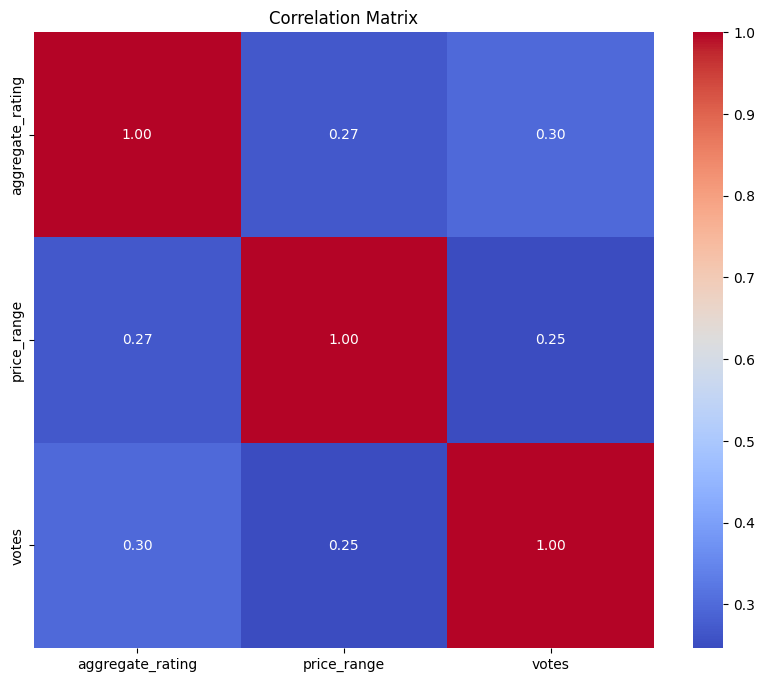

In [125]:
# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix indicates the correlation coefficients between different variables:

- **aggregate_rating** (Restaurant Rating): This column represents the aggregate rating of restaurants. It shows a moderate positive correlation with both the price range and the number of votes, indicating that restaurants with higher ratings tend to have higher price ranges and attract more votes.
  
- **price_range**: This column represents the price range of restaurants. It shows a moderate positive correlation with both the aggregate rating and the number of votes. This suggests that restaurants with higher price ranges tend to have higher ratings and attract more votes.

- **votes**: This column represents the number of votes received by restaurants. It shows a moderate positive correlation with both the aggregate rating and the price range. This implies that restaurants with more votes tend to have higher ratings and higher price ranges.

In [131]:
atleast_5_outlets = outlets[outlets > 4] # I have set the criteria of number of outlets to greater than 4 to remove some outliers.7qqqqqqqqqqqqqqqqqqqqqqqqqqq87777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777

**Observation:**
The absence of fast food chains in the top-rated establishments underscores a notable trend: maintaining a superior service quality amid the prevalence of fast food outlets proves challenging. This observation suggests a correlation between service excellence and rating, emphasizing the impact of service standards on customer satisfaction. As such, this analysis highlights the significance of consistent service delivery in garnering favorable ratings, particularly in an environment saturated with fast food options